# 1️⃣ What is SVM? (Basic Classification Example)
Demonstrates a basic SVM classifier using a linear kernel on the Iris dataset. Shows how SVM works as a supervised learning model to separate two classes.

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, SVR
from sklearn import datasets
from sklearn.metrics import accuracy_score
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
X, y = datasets.load_iris(return_X_y=True)
X, y = X[y != 2], y[y != 2]

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

In [4]:
model = SVC(kernel="linear")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Train Accuracy:", model.score(X_train, y_train)*100)
print("Test Accuracy:", test_accuracy*100)

Train Accuracy: 100.0
Test Accuracy: 100.0


# 2️⃣ What is a Hyperplane? (Visualize Decision Boundary)
Plots the decision boundary (hyperplane) of a linear SVM. The hyperplane is the line that best separates two classes in the feature space.

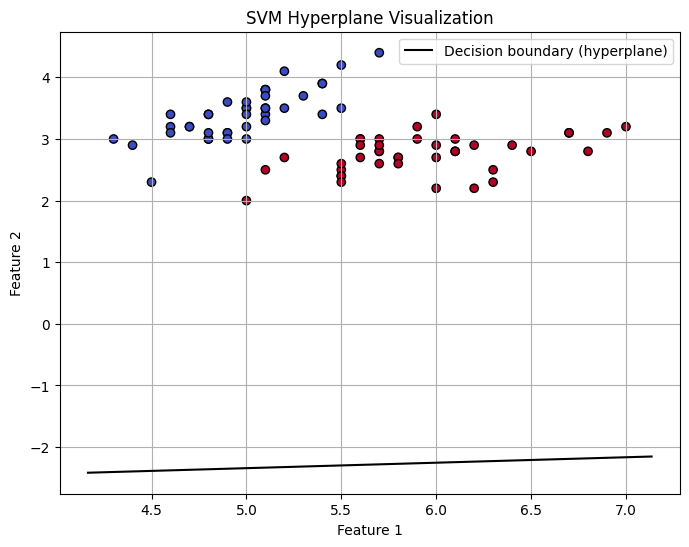

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Plot decision hyperplane for 2D input features
def plot_hyperplane(model, X, y):

    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    w = model.coef_[0]
    b = model.intercept_[0]
    yy = -(w[0] * xx + b) / w[1]

    # Plot decision boundary
    plt.plot(xx, yy, 'k-', label='Decision boundary (hyperplane)')
    plt.title("SVM Hyperplane Visualization")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.grid(True)
    plt.show()

# Usage:
# If you trained an SVM model on X_train and y_train:
# Make sure X_train has only 2 columns, like X_train = X_train.iloc[:, :2]
plot_hyperplane(model, X_train[:, :2], y_train)


# 3️⃣ What is the Margin? (Show Margins and Support Vectors)
Visualizes the margin (distance between the hyperplane and the closest data points) along with support vectors. SVM maximizes this margin for better generalization.

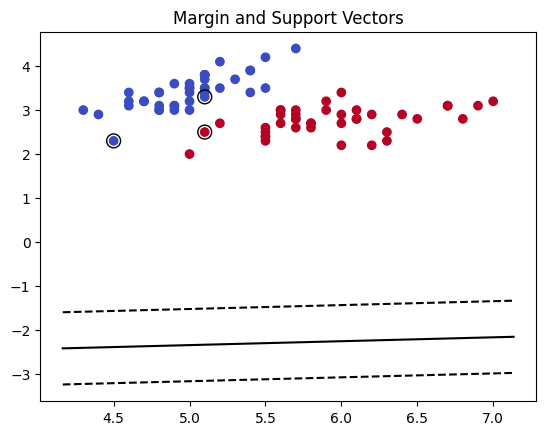

In [8]:
def plot_margin(model, X, y):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
    ax = plt.gca()
    xlim = ax.get_xlim()
    xx = np.linspace(xlim[0], xlim[1])
    w = model.coef_[0]
    b = model.intercept_[0]
    margin = 1 / np.linalg.norm(w)
    yy = -(w[0] * xx + b) / w[1]
    yy_down = yy - np.sqrt(1 + (w[0]/w[1])**2) * margin
    yy_up = yy + np.sqrt(1 + (w[0]/w[1])**2) * margin

    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], 
                s=100, facecolors='none', edgecolors='k')
    plt.title("Margin and Support Vectors")
    plt.show()

plot_margin(model, X_train[:, :2], y_train)


# 4️⃣ What is a Kernel in SVM?
Demonstrates the use of a non-linear kernel (RBF) to classify data that isn't linearly separable. Kernels allow SVM to project data into higher dimensions for better separation.

In [9]:
model_rbf = SVC(kernel='rbf', gamma=0.5)
model_rbf.fit(X_train[:, :2], y_train)
print("RBF Kernel Accuracy:", accuracy_score(y_test, model_rbf.predict(X_test[:, :2]))*100)

RBF Kernel Accuracy: 100.0


# ✅ 5. Linear vs Non-Linear SVM
Compares performance between linear and RBF kernel-based SVMs. Useful to understand when linear separation is not enough.

In [12]:
linear_model = SVC(kernel="linear").fit(X_train[:, :2], y_train)
rbf_model = SVC(kernel="rbf").fit(X_train[:, :2], y_train)
print("Linear SVM Accuracy:", linear_model.score(X_test[:, :2], y_test))
print("Non-Linear (RBF) SVM Accuracy:", rbf_model.score(X_test[:, :2], y_test))

Linear SVM Accuracy: 1.0
Non-Linear (RBF) SVM Accuracy: 1.0


# ✅ 6. Common Kernel Functions
Shows accuracy comparison using different kernels **(linear, polynomial, RBF, sigmoid)** with cross-validation. Helps understand how different kernels affect model performance.

In [13]:
from sklearn.model_selection import cross_val_score

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for k in kernels:
    model = SVC(kernel=k)
    scores = cross_val_score(model, X, y, cv=5)
    print(f"{k} kernel average accuracy: {scores.mean():.2f}")


linear kernel average accuracy: 1.00
poly kernel average accuracy: 1.00
rbf kernel average accuracy: 1.00
sigmoid kernel average accuracy: 0.34


# ✅ 7. Role of C Parameter
Explains how the C parameter controls the **trade-off between a wide margin and classification accuracy**. Smaller C leads to a softer margin; higher C enforces fewer misclassifications.

In [18]:
for C in [0.001, 0.01, 0.1, 1, 10, 100]:
    model = SVC(kernel="linear", C=C)
    model.fit(X_train[:, :2], y_train)
    print(f"C={C} → Accuracy: {model.score(X_test[:, :2], y_test):.2f}")

C=0.001 → Accuracy: 0.85
C=0.01 → Accuracy: 0.85
C=0.1 → Accuracy: 1.00
C=1 → Accuracy: 1.00
C=10 → Accuracy: 1.00
C=100 → Accuracy: 1.00



# ✅ 8. Role of Gamma Parameter
Shows how the gamma parameter (for RBF kernel) **affects the shape and complexity of the decision boundary**. Higher gamma can lead to overfitting.

In [20]:
for gamma in [0.01, 0.1, 1, 10, 100]:
    model = SVC(kernel="rbf", gamma=gamma)
    model.fit(X_train[:,:2], y_train)
    print(f"Gamma={gamma} → Accuracy: {model.score(X_test[:, :2], y_test):.2f}")

Gamma=0.01 → Accuracy: 0.85
Gamma=0.1 → Accuracy: 1.00
Gamma=1 → Accuracy: 1.00
Gamma=10 → Accuracy: 1.00
Gamma=100 → Accuracy: 0.80


# ✅ 9. What is a Support Vector?
Displays the support vectors identified by the SVM model. These are the **critical data points that lie closest to the margin and influence the hyperplane's position.**

In [21]:
model = SVC(kernel="linear").fit(X_train, y_train)
print("Support Vectors:\n", model.support_vectors_)
print("Indices of support vectors:", model.support_)

Support Vectors:
 [[4.5 2.3 1.3 0.3]
 [5.1 3.3 1.7 0.5]
 [5.1 2.5 3.  1.1]]
Indices of support vectors: [15 47 71]


# ✅ 10. SVM for Regression (SVR)
Implements Support Vector Regression using the Diabetes dataset. SVR tries to fit the best line within a certain margin (epsilon) around the true values.

In [30]:
X_reg, y_reg = datasets.load_diabetes(return_X_y=True)
print(X_reg)
X_reg = X_reg[:, np.newaxis,2]
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, random_state=42, test_size=0.2)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]


In [31]:
svr = SVR(kernel="rbf", C=100, epsilon=10)

In [32]:
svr.fit(X_train, y_train)


SVR(C=100, epsilon=10)

In [35]:
y_pred = svr.predict(X_test)

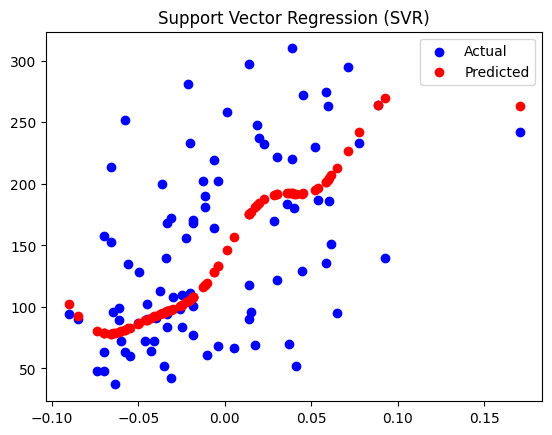

In [45]:
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, svr.predict(X_test), color='red', label='Predicted')
plt.title("Support Vector Regression (SVR)")
plt.legend()
plt.show()